In [1]:
import geopandas as gpd

urban = gpd.read_file('/data/acker/shapefiles/tl_rd22_us_uac20.shp')
urban

,UACE20,GEOID20,NAME20,NAMELSAD20,LSAD20,MTFCC20,UATYP20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,67240,67240,"Pampa, TX","Pampa, TX Urban Area",67,G3500,U,S,21374659,0,+35.5451610,-100.9656498,"POLYGON ((-100.94529 35.53832, -100.94525 35.5..."
1,23230,23230,"Delta, CO","Delta, CO Urban Area",67,G3500,U,S,16126572,129608,+38.7454236,-108.0619343,"POLYGON ((-108.04131 38.74094, -108.041 38.740..."
2,36001,36001,"Gunnison, CO","Gunnison, CO Urban Area",67,G3500,U,S,9468678,11725,+38.5405505,-106.9384998,"POLYGON ((-106.92674 38.53565, -106.92795 38.5..."
3,45775,45775,"Kuna, ID","Kuna, ID Urban Area",67,G3500,U,S,16384896,46009,+43.5010643,-116.4168990,"MULTIPOLYGON (((-116.39896 43.48833, -116.3988..."
4,05410,05410,"Basalt, CO","Basalt, CO Urban Area",67,G3500,U,S,9433311,68797,+39.3835983,-107.0807354,"MULTIPOLYGON (((-107.1105 39.40463, -107.11046..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,74908,74908,"Ridgway, PA","Ridgway, PA Urban Area",67,G3500,U,S,6495687,98944,+41.4294622,-078.7380986,"POLYGON ((-78.72689 41.4229, -78.72684 41.4228..."
2641,96843,96843,"Wise--Norton, VA","Wise--Norton, VA Urban Area",67,G3500,U,S,28350106,95639,+36.9649058,-082.5955171,"POLYGON ((-82.567 36.97083, -82.56706 36.97084..."
2642,88921,88921,"Tullahoma, TN","Tullahoma, TN Urban Area",67,G3500,U,S,38296270,0,+35.3697423,-086.2140939,"MULTIPOLYGON (((-86.19416 35.3446, -86.1943 35..."
2643,60502,60502,"Mount Washington, KY","Mount Washington, KY Urban Area",67,G3500,U,S,33680478,168692,+38.0411866,-085.5702925,"MULTIPOLYGON (((-85.54262 38.03232, -85.54265 ..."


In [2]:
urban.columns

Index(['UACE20', 'GEOID20', 'NAME20', 'NAMELSAD20', 'LSAD20', 'MTFCC20',
       'UATYP20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20',
       'INTPTLON20', 'geometry'],
      dtype='object')

In [3]:
urban = urban.to_crs(epsg=4269)

In [4]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

counties_conus = counties_conus.drop(['STATEFP', 'COUNTYFP', "COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)
counties_conus = counties_conus.to_crs(epsg=4269)

<GeoAxes: >

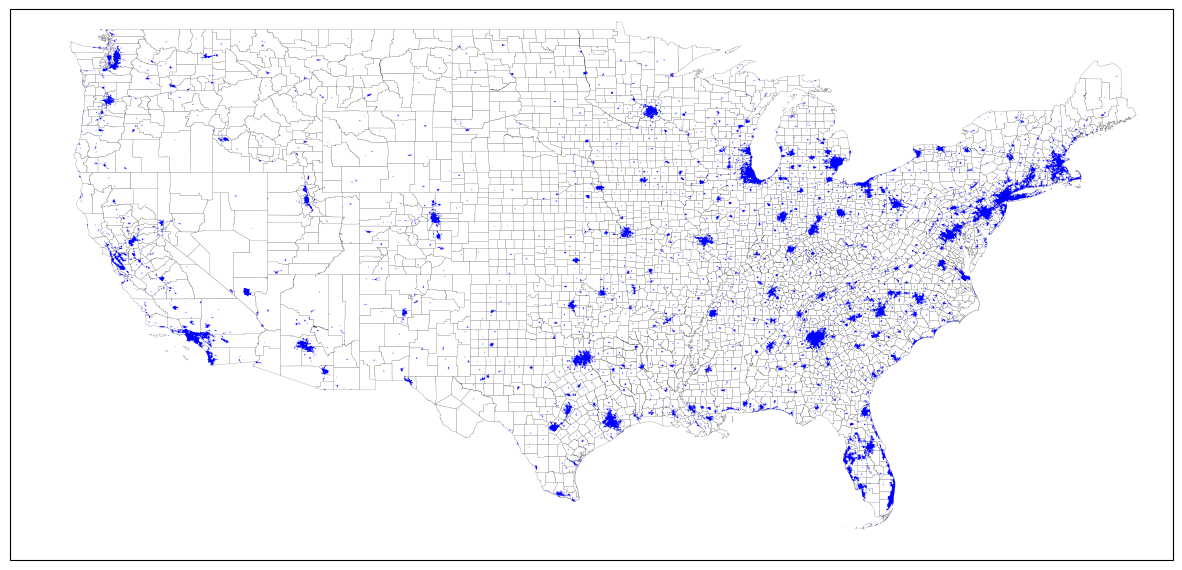

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl

cmap = 'turbo'
norm = mpl.colors.Normalize(vmin=4, vmax=12)  # Adjust vmin and vmax based on your data range

# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-128, -65, 23, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Plot the data for each map, including the color for missing data
counties_conus.plot(
    linewidth=0.1, edgecolor='black', 
    ax=ax_conus, color='white'
)
urban.plot(
    linewidth=0.1, edgecolor=None, 
    ax=ax_conus, color='blue'
)

In [6]:
df = gpd.read_file('/data/acker/ALA/paper2/washu_2021-2023_merged.shp')
df

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Val,geometry
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5..."
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4..."
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4..."
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462..."
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7..."
...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691..."
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675..."
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7..."
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957..."


In [7]:
import geopandas as gpd

# Reproject both to equal-area projection before area calculations
df = df.to_crs(epsg=5070)
urban = urban.to_crs(epsg=5070)

# Perform geometric intersection: gives only urban areas inside each county
urban_intersection = gpd.overlay(df, urban, how='intersection')

# Calculate area of the clipped (within-county) urban polygons
urban_intersection['urban_area'] = urban_intersection.geometry.area

# Calculate area of full counties
df['county_area'] = df.geometry.area

# Sum urban area per county
urban_area_by_county = (
    urban_intersection
    .groupby('GEOID')['urban_area']
    .sum()
    .reset_index()
)

# Merge back into full counties GeoDataFrame
df = df.merge(urban_area_by_county, on='GEOID', how='left')

# Fill missing values for counties with no urban area
df['urban_area'] = df['urban_area'].fillna(0)

# Calculate % of county that is urban
df['urban_pct'] = df['urban_area'] / df['county_area']

# (Optional) Reproject back to original CRS if needed
df = df.to_crs(epsg=4269)

/tmp/ipykernel_5051/3224967243.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 4409 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  urban_intersection = gpd.overlay(df, urban, how='intersection')


In [8]:
urban_counties_25 = df[df['urban_pct'] >= 0.25]
urban_counties_25 = urban_counties_25.to_crs(epsg=4269)
urban_counties_25

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Val,geometry,county_area,urban_area,urban_pct
5,5,06037,12.533333,06,037,7,06_037,12.2,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",1.059873e+10,3.562111e+09,0.336088
7,7,06059,11.500000,06,059,10,06_059,10.2,"POLYGON ((-118.11442 33.74518, -118.11305 33.7...",2.067668e+09,1.367551e+09,0.661398
14,14,18097,10.766666,18,097,18,18_097,11.9,"POLYGON ((-86.32812 39.86613, -86.32537 39.866...",1.043815e+09,9.282280e+08,0.889265
15,15,48201,10.700000,48,201,20,48_201,12.5,"MULTIPOLYGON (((-94.97839 29.68365, -94.97744 ...",4.587275e+09,3.391479e+09,0.739323
19,19,26163,10.653334,26,163,24,26_163,13.0,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",1.636305e+09,1.393535e+09,0.851635
...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,25009,6.600000,25,009,2449,25_009,7.2,"MULTIPOLYGON (((-70.58028 42.63603, -70.57509 ...",1.375637e+09,8.425548e+08,0.612484
481,481,53033,6.333333,53,033,2637,53_033,8.3,"MULTIPOLYGON (((-122.43694 47.66172, -122.4255...",5.676592e+09,1.437754e+09,0.253278
490,490,33015,6.200000,33,015,2719,33_015,5.6,"MULTIPOLYGON (((-70.61702 42.97718, -70.61529 ...",1.881990e+09,6.559353e+08,0.348533
510,510,53035,5.633333,53,035,2905,53_035,5.5,"MULTIPOLYGON (((-122.50492 47.54653, -122.4914...",1.062973e+09,4.167053e+08,0.392019


In [9]:
# Define a binary column for urban vs non-urban
df['urban_category'] = df['urban_pct'].apply(lambda x: 'Urban (≥50%)' if x >= 0.50 else 'Non-Urban (<50%)')


In [10]:
df.to_file('/data/acker/ALA/paper2/urban_counties.shp')

/tmp/ipykernel_5051/2037766930.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('/data/acker/ALA/paper2/urban_counties.shp')
/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'county_area' to 'county_are'
  ogr_write(
/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'urban_category' to 'urban_cate'
  ogr_write(
/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 19256197000.3782463 of field county_are of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 199022406.31689322 of field urban_area of feature 0 not successfully written. Possibly d

In [11]:
merged_df = df.rename(columns={'Design Val':'Design Value'})

In [12]:
merged_df['diff'] =  merged_df['PM25_90th'] - merged_df['Design Value']
merged_df['abs_diff'] =  abs(merged_df['PM25_90th'] - merged_df['Design Value'])

In [13]:
u = merged_df[merged_df['urban_category'] == 'Urban (≥50%)']
u['abs_diff'].describe()

count    72.000000
mean      0.820972
std       0.625873
min       0.000000
25%       0.416667
50%       0.633333
75%       1.133334
max       2.400000
Name: abs_diff, dtype: float64

In [14]:
u = merged_df[merged_df['urban_category'] == 'Non-Urban (<50%)']
u['abs_diff'].describe()

count    4.640000e+02
mean     9.100431e-01
std      8.672443e-01
min      9.536743e-08
25%      3.000000e-01
50%      6.449998e-01
75%      1.300000e+00
max      5.733334e+00
Name: abs_diff, dtype: float64

In [15]:
# Define threshold
threshold = 9.0

# Function to classify each row
def classify(row):
    cdv = row['Design Value']
    cdve = row['PM25_90th']
    if cdv > threshold and cdve > threshold:
        return 'TP'
    elif cdv > threshold and cdve <= threshold:
        return 'FP'
    elif cdv <= threshold and cdve > threshold:
        return 'FN'
    else:
        return 'TN'

# Apply the classification
merged_df['classification'] = merged_df.apply(classify, axis=1)

# Print counts
print(merged_df['classification'].value_counts())

# Optional: filter into separate DataFrames
TP = merged_df[merged_df['classification'] == 'TP']
FP = merged_df[merged_df['classification'] == 'FP']
FN = merged_df[merged_df['classification'] == 'FN']
TN = merged_df[merged_df['classification'] == 'TN']
print('TP:',len(TP))
print('FP:',len(FP))
print('FN:', len(FN))
print('TN:',len(TN))

classification
TN    376
TP     63
FP     52
FN     45
Name: count, dtype: int64
TP: 63
FP: 52
FN: 45
TN: 376


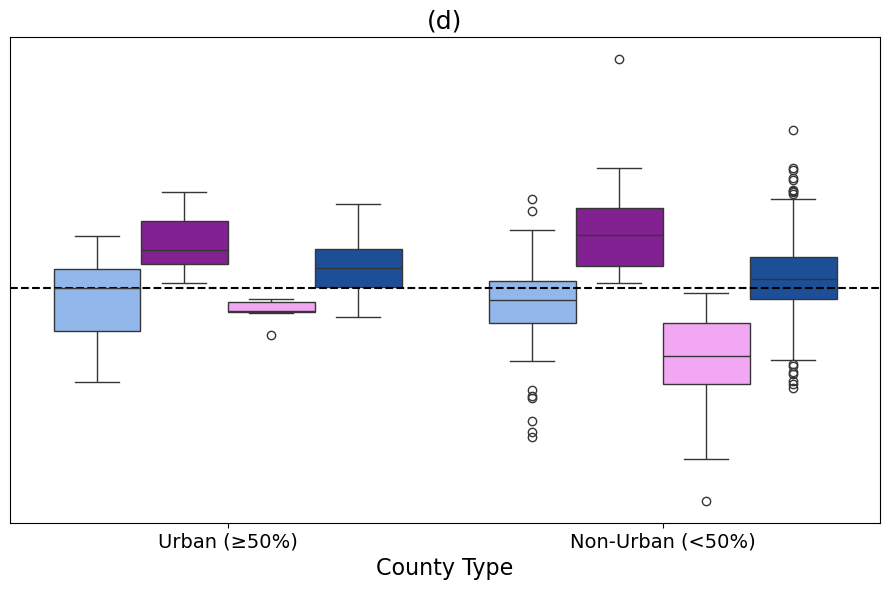

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 6))

sns.boxplot(
    data=merged_df,
    x='urban_category',
    y='diff',
    hue='classification',
    order=['Urban (≥50%)', 'Non-Urban (<50%)'],
    palette={'TP': '#83b5fa', 'TN': '#074cad', 'FP': '#fe9bfe', 'FN': '#8E0EA5'}
)

plt.rcParams["font.family"] = "serif"
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('County Type', fontsize=16)
plt.xticks(fontsize=14)
plt.gca().tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.ylabel('', fontsize=13)
plt.title('(d)', fontsize=18)
plt.legend().remove()
plt.tight_layout()
plt.show()


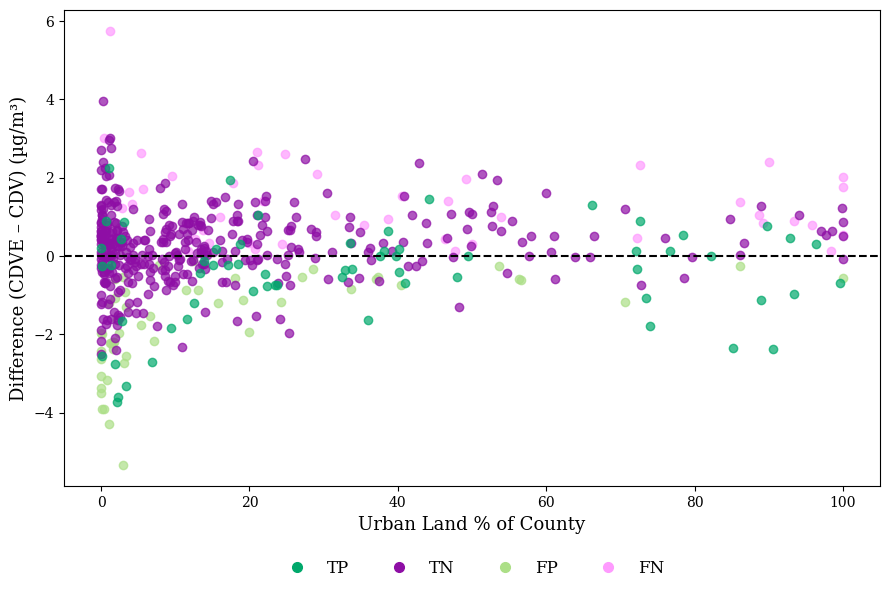

In [19]:
import matplotlib.lines as mlines

plt.figure(figsize=(9, 6))

# Color palette for classification
colors = {
    'TP': "#00A86B",
    'TN': "#8E0EA5",
    'FP': "#ACDF87",
    'FN': "#fe9bfe"
}

# Plot each classification group
for label, group in merged_df.groupby('classification'):
    plt.scatter(
        group['urban_pct'] * 100,  # convert to percentage
        group['diff'],
        label=label,
        color=colors.get(label, 'gray'),
        alpha=0.7,
        edgecolors=None
    )

plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Urban Land % of County', fontsize=13)
plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=13)
#plt.title('Difference vs. Percent Urban Area by Classification', fontsize=14)
legend_order = ['TP', 'TN', 'FP', 'FN']
legend_handles = [
    mlines.Line2D([], [], color=colors[label], marker='o', linestyle='None',
                  markersize=7, markeredgecolor=None, label=label)
    for label in legend_order
]

plt.legend(
    handles=legend_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    frameon=False,
    fontsize=12
)

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
# Group by classification and mountain region
stats = (
    merged_df
    .groupby(['classification', 'urban_category'])['diff']
    .agg(['count', 'mean', 'std', 'min', 'max', 'median'])
    .reset_index()
    .sort_values(by=['classification', 'urban_category'])
)

# Add a new column for range
stats['range'] = stats['max'] - stats['min']

# Display the summary
pd.set_option('display.float_format', '{:.2f}'.format)
print(stats)


  classification    urban_category  count  mean  std   min   max  median  \
0             FN  Non-Urban (<50%)     31  1.44 1.16  0.13  5.73    1.33   
1             FN      Urban (≥50%)     14  1.14 0.74  0.13  2.40    0.95   
2             FP  Non-Urban (<50%)     46 -1.83 1.19 -5.33 -0.13   -1.70   
3             FP      Urban (≥50%)      6 -0.58 0.33 -1.17 -0.27   -0.58   
4             TN  Non-Urban (<50%)    341  0.21 0.95 -2.50  3.97    0.23   
5             TN      Urban (≥50%)     35  0.56 0.68 -0.73  2.10    0.50   
6             TP  Non-Urban (<50%)     46 -0.52 1.32 -3.73  2.23   -0.30   
7             TP      Urban (≥50%)     17 -0.36 1.11 -2.37  1.30   -0.00   

   range  
0   5.60  
1   2.27  
2   5.20  
3   0.90  
4   6.47  
5   2.83  
6   5.97  
7   3.67  


In [18]:
print("Urban Land % Stats by Classification:")
urban_stats = merged_df.groupby('classification')['urban_pct'].agg(['mean', 'median'])
urban_stats['median'] = (urban_stats['median']) * 100
urban_stats['mean'] = urban_stats['mean'] * 100  # Convert to percentage
urban_stats = urban_stats[['mean', 'median']].round(2)  # Keep only what you need

print(urban_stats)

Urban Land % Stats by Classification:
                mean  median
classification              
FN             40.65   29.07
FP             15.94    3.28
TN             16.76    8.75
TP             36.75   32.41


In [28]:
# Calculate overall correlation
overall_corr = merged_df['urban_pct'].corr(merged_df['diff'])
print(f"Overall correlation between urban land % and difference: {overall_corr:.3f}")

# Calculate correlation by classification
print("\nCorrelation by classification:")
by_class_corr = merged_df.groupby('classification').apply(
    lambda df: df['urban_pct'].corr(df['diff'])
)
print(by_class_corr.round(3))


Overall correlation between urban land % and difference: 0.146

Correlation by classification:
classification
FN   -0.21
FP    0.53
TN    0.12
TP    0.15
dtype: float64


/tmp/ipykernel_15368/3296383850.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_class_corr = merged_df.groupby('classification').apply(


In [30]:
# Calculate overall correlation
overall_corr = merged_df['urban_pct'].corr(merged_df['abs_diff'])
print(f"Overall correlation between urban land % and difference: {overall_corr:.3f}")

# Calculate correlation by classification
print("\nCorrelation by classification:")
by_class_corr = merged_df.groupby('classification').apply(
    lambda df: df['urban_pct'].corr(df['abs_diff'])
)
print(by_class_corr.round(3))


Overall correlation between urban land % and difference: -0.111

Correlation by classification:
classification
FN   -0.21
FP   -0.53
TN   -0.07
TP   -0.23
dtype: float64


/tmp/ipykernel_15368/2864726007.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_class_corr = merged_df.groupby('classification').apply(
